<a href="https://colab.research.google.com/github/ilaid58/gomycode_LabPhase/blob/main/LabPhase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- [PHASE I](#1)
- [PHASE II](#2)
- [PHASE III](#3)

<a name=1></a>
#**Phase I**

In [11]:
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

In [12]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)
# data_by_artist, data, data_by_genres, data_by_year, data_w_genres
id_list = ['13n6hvWTMIFM1-snta5_BWWKppiW2CMBU', '19Q95OpXrs3Z5xJ7Wg1_4ZcO3gTdSsUvy', '1WEBcdr1VMuKSq_Z7CNCIvsDCi9LUh-6c',
           '1Wg0_PblHBr_wOW_cuqtkz95Jb5o2y_Cs', '1vsXAQpVGCEZ3iZwEKduyMxR5zY79ltCr']
file_list = ['data_by_artist', 'data', 'data_by_genres', 'data_by_year', 'data_w_genres']
for idx in range(len(id_list)):
  file_download = drive.CreateFile({'id':id_list[idx]})
  file_download.GetContentFile(file_list[idx]+'.csv')

##**1. Read the data**

In [8]:
import pandas as pd
import numpy as np

In [9]:
def read_data(files):
  for f in files:
    yield pd.read_csv(f+'.csv')

In [13]:
data_by_artist, data, data_by_genres, data_by_year, data_w_genres = read_data(file_list)

In [ ]:
i = 0
for i_data in read_data(file_list):
  print(file_list[i])
  print(i_data)
  print('\n------------------------')
  i += 1

data_by_artist
       mode  count  acousticness  \
0         1      9      0.590111   
1         1     26      0.862538   
2         1      7      0.856571   
3         1     27      0.884926   
4         1      7      0.510714   
...     ...    ...           ...   
28675     1      2      0.512000   
28676     0      2      0.541000   
28677     1     11      0.785455   
28678     1      2      0.381000   
28679     1      2      0.568000   

                                                 artists  danceability  \
0                       "Cats" 1981 Original London Cast      0.467222   
1                              "Cats" 1983 Broadway Cast      0.441731   
2            "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3         "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4      "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   
...                                                  ...           ...   
28675                             

##**5. Display first two row of data, data_genre, year_data and artist _data**

###**data**

In [ ]:
data.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


###**data_genre**

In [ ]:
data_by_genres.head(2)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


###**year_data**

In [ ]:
data_by_year.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


##**artists_data**

In [ ]:
data_by_artist.head(2)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690,0.176212,103.044154,0.268865,30.576923,5


##**6. Retrieve information about data and genre_data**

###**infromation about data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

###**information about data_genre**

In [ ]:
data_by_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


##**7. create decade column in data using apply() and lambda**

In [ ]:
decade = data_by_year['year'].apply(lambda x: (x//10)*10)
data_by_year['decade'] = decade

In [ ]:
data_by_year

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,decade
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2,1920
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10,1920
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0,1920
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1920
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0,2010
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1,2010
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1,2010
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1,2010


<a name=2></a>
#**Phase II**

In [ ]:
import seaborn as sns
import plotly.express as px

##**1. Distribution of tracks accross different decade**

<Axes: xlabel='decade', ylabel='count'>

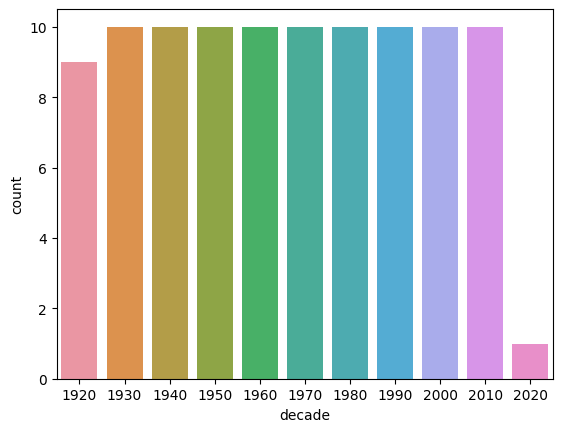

In [ ]:
sns.countplot(data=data_by_year, x='decade')

##**2. Plot the trends of various sound features over decades**

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
px.line(data_by_year, x='year', y=sound_features)

##**3. Trend of loudness over decades**

In [ ]:
px.line(data_by_year, x='year', y='loudness')

##**4. Trend of various sound features by top 10 genres based on popularity**

In [ ]:
top_10 = data_by_genres.sort_values(['popularity'], ascending=False).head(10)

In [ ]:
px.bar(top_10, x='genres', y=sound_features, barmode='group')

##**5. Generate word cloud of the genres**

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from wordcloud.wordcloud import STOPWORDS
comment_words = data_by_genres['genres']
wordcloud_genres = WordCloud(width=800, height=800, background_color='white', max_words=40, min_font_size=10, collocations=False).generate(str(comment_words))

##**6. Plot the word cloud of the genres**

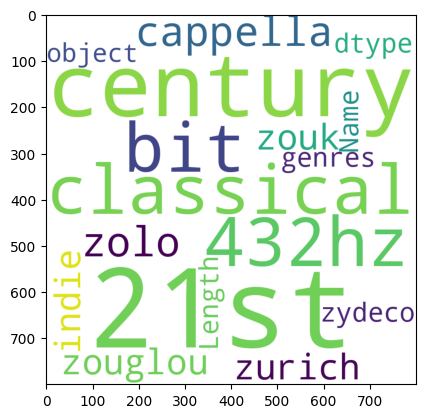

In [ ]:
plt.imshow(wordcloud_genres)

#**7. Generate word cloud of the artists**

In [ ]:
comment_words = data_by_artist['artists']
wordcloud_artists = WordCloud(width=800, height=800, background_color='white', min_word_length=3, max_words=40, min_font_size=10).generate(str(comment_words))

##**8. Plot the word cloud of artists**

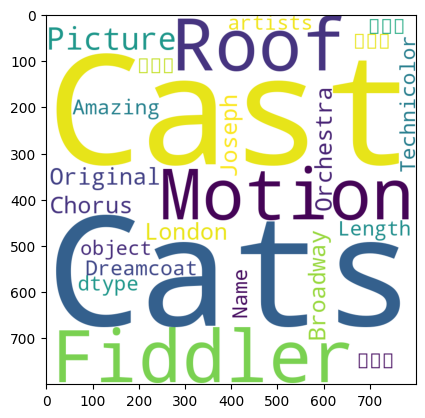

In [ ]:
plt.imshow(wordcloud_artists)

##**9. Top 10 artists with the most songs produced**

In [ ]:
top_10_artists = data_by_artist[['count', 'artists']].sort_values('count', ascending=False).head(10)

In [ ]:
top_10_artists

,count,artists
8367,3169,Francisco Canaro
28561,2422,Эрнест Хемингуэй
28560,2136,Эрих Мария Ремарк
8434,1459,Frank Sinatra
10714,1256,Ignacio Corsini
27109,1200,Vladimir Horowitz
1682,1146,Arturo Toscanini
2707,1103,Billie Holiday
12378,1061,Johnny Cash
7426,1023,Elvis Presley


##**10. Top 10 artists with highest popularity score**

In [ ]:
 top_10_popularity = data_by_artist[['artists', 'popularity']].sort_values('popularity', ascending=False).head(10)

In [ ]:
top_10_popularity

,artists,popularity
20966,Ritt Momney,93.0
14354,Lele Pons,92.0
15070,Los Legendarios,90.0
11764,Jerry Di,89.0
28263,salem ilese,88.0
23687,Surf Mesa,88.0
7463,Emilee,88.0
213,A7S,87.0
26318,Towy,86.0
16453,Master KG,86.0


##**11. Conclusion**

- Sound features changes over year
- All songs are a least with minimum value for chiness electropop
- there are 3 instrumentalness (south african house, russian dance, guaracha)
- the top 10 artists who produced the most songs are not the top 10 artists who are popular

<a name=3></a>
#**Phase III**

##**1. Fit the kmean cluster in the genre data using 12 cluster**

In [ ]:
# transform the 'genres' column into numerical value
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data_by_genres['genres_num'] = encode.fit_transform(data_by_genres['genres'])

# define features
features_genres = [i for i in data_by_genres.columns if i not in ['genres']]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean = KMeans(n_clusters=12)

In [ ]:
y_labels = kmean.fit_predict(data_by_genres[features_genres])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data_by_genres['labels'] = y_labels

##**2. Visualize clusters of genres**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(data_by_genres[features_genres])

In [ ]:
fig = px.scatter(x=x_tsne[:, 0], y=x_tsne[:, 1], color=y_labels)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

##**3. Fit kmean model on song data**

In [ ]:
features_data = [i for i in data.columns if data[i].dtype!=object]

In [ ]:
kmeans = KMeans(25)
y_labels = kmeans.fit_predict(data[features_data])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(2)
x_pca = pca.fit_transform(data[features_data])

##**4. Visualize the cluster of songs**

In [ ]:
fig = px.scatter(x=x_pca[:, 0], y=x_pca[:, 1], color=y_labels)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

#**Phase IV**

##**1. Install spotify library**

In [3]:
!pip install python-dotenv spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"benalimohamedlaid","key":"3d80d53089593bc8649b7bcd2b43460d"}'}

##**2. Import necessary library**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle_secrets

ERROR: Could not find a version that satisfies the requirement kaggle_secrets (from versions: none)
ERROR: No matching distribution found for kaggle_secrets


In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict


## **4. Instance of the Spotify API client using the obtained credentials**



In [5]:
client_id = "4521ea3ca1234980860bb3648d385823"
client_secret = "204edde1912c4044a0e4188e6128f7c2"

# Authenticate with the Spotify API
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)


## **5. Define function that finds song detail**

---



In [21]:
import re

In [33]:
def find_song2(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=5)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [44]:
def find_song(name, df):
  row = 0
  row_list = []
  for i in df['name']:
    result = re.search(name, i, re.IGNORECASE)
    if result is not None:
      row_list.append(row)
    row += 1
  return df.iloc[row_list]

## **6. Function  that fetches song details from the dataset or searches for details in the Spotify dataset if unavailable**



In [49]:
features_song = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_song_data(song, spotify_data):
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    except IndexError:
        return find_song(song['name'], song['year'])

## **7. Function that calculate mean vector of numerical features**

In [128]:
def get_mean_vector(song_list):
  songs_values = song_list[features_song]
  songs_means = songs_values.mean()
  return songs_means.values

## **8. Function that flattens a list of dictionaries into dictionary**

In [ ]:
def flatten_dict_list(dict_list):
    flattened_dict = {}
    for i in dict_list:
        for key, value in i.items():
            if key in flattened_dict:
                flattened_dict[key].append(value)
            else:
                flattened_dict[key] = [value]
    return flattened_dict


## **9. Function that recommends similar songs based on a given list of songs**

In [74]:
!pip install scipy

In [76]:
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

In [219]:
def recommend_songs(song_list, limit=10):
  song_list_values = song_list[features_song]
  song_means = get_mean_vector(song_list_values)
  distances = cdist(np.atleast_2d(song_means), data[features_song].values, 'euclidean')
  distances = distances.reshape(170653, 1)
  ord_dist = np.sort(distances)
  idx = np.where(np.isin(distances, ord_dist[:100]))[0]
  df_recomm = data.iloc[idx]
  return df_recomm

In [220]:
df = recommend_songs(find_song('Danny', data))

In [203]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


array([  3566,   3989,   4075,  21342,  22578,  25022,  77977,  84978,
       145815, 158887])